In [ ]:
################  DS Notes    ###########

1. use data and extract insights
2. avg price
3. top 5 brand wise list
4. list of cars which are least used
5. which brand has most price in reselling


**Performing tasks on csv file**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("autos.csv", encoding='latin1')

In [3]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004.0,manuell,158.0,andere,"150,000km",3.0,lpg,peugeot,nein,2016-03-26 00:00:00,0.0,79588.0,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997.0,automatik,286.0,7er,"150,000km",6.0,benzin,bmw,nein,2016-04-04 00:00:00,0.0,71034.0,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009.0,manuell,102.0,golf,"70,000km",7.0,benzin,volkswagen,nein,2016-03-26 00:00:00,0.0,35394.0,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007.0,automatik,71.0,fortwo,"70,000km",6.0,benzin,smart,nein,2016-03-12 00:00:00,0.0,33729.0,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003.0,manuell,0.0,focus,"150,000km",7.0,benzin,ford,nein,2016-04-01 00:00:00,0.0,39218.0,2016-04-01 14:38:50


In [15]:
df = df.dropna(subset=['price'])

In [21]:
df['price']=df['price'].astype(str).str.replace('$', '').str.replace(',', '').astype(int)

In [22]:
df['price']

,price
0,5000
1,8500
2,8990
3,4350
4,1350
...,...
21802,6499
21803,650
21804,1550
21805,6800


In [23]:
df['price'].sum()

np.int64(147235687)

**AVG MEAN** of Price

In [24]:
df['price'].mean()

np.float64(6751.762599165406)

In [25]:
df['odometer']=df['odometer'].str.replace('km', '').str.replace(',', '').astype(int)

In [26]:
df['odometer']

,odometer
0,150000
1,150000
2,70000
3,70000
4,150000
...,...
21802,150000
21803,150000
21804,150000
21805,150000


In [27]:
df['notRepairedDamage'].unique()

array(['nein', nan, 'ja'], dtype=object)

In [28]:
df['notRepairedDamage'].value_counts()

,count
notRepairedDamage,
nein,15369
ja,2148


**TOP 5 Brands**

In [29]:
df['brand'].value_counts().head(5)

,count
brand,
volkswagen,4689
opel,2346
bmw,2324
mercedes_benz,2068
audi,1870


In [30]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

**LEAST USED** Brands

In [31]:
df.sort_values('odometer').head(10)[['name','seller','model','vehicleType','fuelType','notRepairedDamage','brand','dateCreated','lastSeen']]

,name,seller,model,vehicleType,fuelType,notRepairedDamage,brand,dateCreated,lastSeen
2709,Super_schoene_Alufelgen,privat,c_klasse,NaN,NaN,NaN,mercedes_benz,2016-03-27 00:00:00,2016-03-31 01:16:02
11481,Seat_Arosa_1.0_l,privat,arosa,kleinwagen,NaN,NaN,seat,2016-03-26 00:00:00,2016-03-28 08:15:37
5889,Golf_4_1.9_TDI,privat,golf,kleinwagen,diesel,nein,volkswagen,2016-03-10 00:00:00,2016-03-19 19:47:19
10909,Mercedes_E_240_T_Avantgarde__TÜF_neu,privat,e_klasse,kombi,benzin,nein,mercedes_benz,2016-03-11 00:00:00,2016-03-12 06:45:15
7653,renault_twingo,privat,twingo,NaN,NaN,NaN,renault,2016-03-19 00:00:00,2016-03-22 03:16:29
7843,chrysler_voyager_2.4_16v,privat,voyager,bus,benzin,ja,chrysler,2016-03-10 00:00:00,2016-04-05 13:17:29
7512,Bmw_750i_Tausch_oder_Angebot,privat,7er,limousine,NaN,nein,bmw,2016-03-28 00:00:00,2016-04-06 22:17:41
7510,OPEL_CORSA_WEISS_DIESEL,privat,corsa,NaN,diesel,NaN,opel,2016-03-24 00:00:00,2016-04-03 08:15:41
106,Opel_Tigra_A_1.6_16V_Schlachtfahrzeug__GSI_C20...,privat,tigra,coupe,NaN,ja,opel,2016-03-26 00:00:00,2016-04-05 19:47:10
102,Ford_Ka_dunkel_blau,privat,ka,kleinwagen,benzin,ja,ford,2016-03-22 00:00:00,2016-04-02 01:47:21


**MOST TOP 10 Brands**

In [32]:
df.sort_values('odometer').tail(10)[['name','seller','model','vehicleType','fuelType','notRepairedDamage','brand','dateCreated','lastSeen']]

,name,seller,model,vehicleType,fuelType,notRepairedDamage,brand,dateCreated,lastSeen
23,Peugeot_Boxer_2_2_HDi_120_Ps_9_Sitzer_inkl_Klima,privat,NaN,bus,diesel,nein,peugeot,2016-03-10 00:00:00,2016-03-17 08:45:17
5,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,privat,voyager,bus,diesel,NaN,chrysler,2016-03-21 00:00:00,2016-04-06 09:45:21
4,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,focus,kombi,benzin,nein,ford,2016-04-01 00:00:00,2016-04-01 14:38:50
21801,Saab_9_3__I__2.0_T_Aero___sehr_selten_und_sehr...,privat,andere,limousine,benzin,nein,saab,2016-03-09 00:00:00,2016-03-12 23:45:54
21802,Skoda_Octavia_RS_2.0_TFSI__Guter_Zustand__Somm...,privat,octavia,limousine,benzin,nein,skoda,2016-03-31 00:00:00,2016-04-06 10:45:43
21803,Suzuki_Wagon,privat,andere,bus,benzin,ja,suzuki,2016-04-02 00:00:00,2016-04-04 10:46:10
21804,Audi_A4_limosine,privat,a4,limousine,benzin,nein,audi,2016-04-04 00:00:00,2016-04-06 13:45:47
21805,Verkaufe_Opel_Zafira_1.9_CDTI,privat,zafira,bus,diesel,nein,opel,2016-03-12 00:00:00,2016-03-12 14:51:44
1,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,7er,limousine,benzin,nein,bmw,2016-04-04 00:00:00,2016-04-06 14:45:08
0,Peugeot_807_160_NAVTECH_ON_BOARD,privat,andere,bus,lpg,nein,peugeot,2016-03-26 00:00:00,2016-04-06 06:45:54


In [37]:
d=df.loc[df['seller'].isna()]
d

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen


In [38]:
df['seller'].isnull().sum()

np.int64(0)

**For AVG RESELL value**

In [39]:
avg_resell_values= df.groupby('brand')['price'].mean().sort_values()

In [40]:
avg_resell_values

,price
brand,
daewoo,874.843750
trabant,1351.939394
daihatsu,1779.383333
rover,1793.185185
renault,2381.267241
saab,2446.666667
subaru,2482.285714
fiat,2691.429285
opel,2810.277494


**TOP RESELL Value with brands**

In [41]:
avg_resell_values.tail(10)

,price
brand,
bmw,7891.026248
mercedes_benz,8512.717602
audi,8961.831551
jeep,9551.813953
mini,10378.015385
jaguar,11104.333333
ford,11671.596244
land_rover,13764.372549
porsche,43615.224000


**LEAST RESELL values**

In [42]:
avg_resell_values.head(10)

,price
brand,
daewoo,874.843750
trabant,1351.939394
daihatsu,1779.383333
rover,1793.185185
renault,2381.267241
saab,2446.666667
subaru,2482.285714
fiat,2691.429285
opel,2810.277494


**MAX RESELL Price**

Brand with Highest Average Resale Price

In [49]:
avg_resell_values.idxmax()

'sonstige_autos'

In [50]:
avg_resell_values.max()

54276.464566929135

<Axes: ylabel='Frequency'>

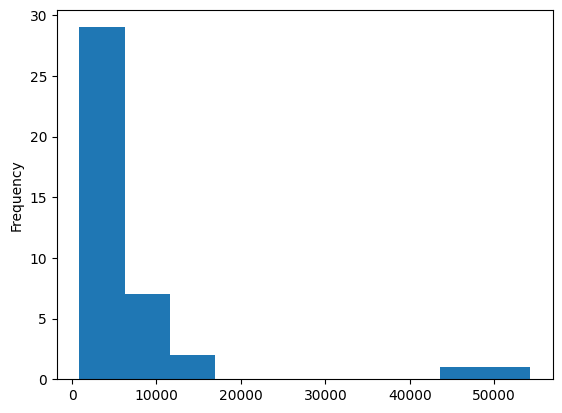

In [44]:
avg_resell_values.plot(kind='hist')

**With Mileage**

In [45]:
avg_resell_values_1= df.groupby(['brand','odometer'])['price'].mean().sort_values()

In [47]:
avg_resell_values_1=avg_resell_values_1.sort_index(level='odometer')

In [48]:
avg_resell_values_1

,,price
brand,odometer,
alfa_romeo,5000,3833.333333
audi,5000,14549.166667
bmw,5000,5798.475000
chevrolet,5000,2100.250000
chrysler,5000,1266.666667
...,...,...
suzuki,150000,2163.568966
toyota,150000,3240.377953
trabant,150000,0.000000


Brand with Highest Average Resale Price and Lowest Avg resale price

In [52]:
a=[avg_resell_values_1.idxmax(),avg_resell_values_1.idxmin()]

In [53]:
a

[('sonstige_autos', np.int64(100000)), ('jaguar', np.int64(5000))]

**For Top models**


Helps a business identify which models to stock more

In [58]:
tm= df.groupby(['brand','model']).size().sort_values(ascending=False)

In [59]:
tm.head(10)

brand          model   
volkswagen     golf        1783
bmw            3er         1193
volkswagen     polo         782
opel           corsa        758
               astra        636
volkswagen     passat       625
audi           a4           566
mercedes_benz  c_klasse     511
bmw            5er          500
mercedes_benz  e_klasse     408
dtype: int64

In [61]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [64]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000,control,bus,2004.0,manuell,158.0,andere,150000,3.0,lpg,peugeot,nein,2016-03-26 00:00:00,0.0,79588.0,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500,control,limousine,1997.0,automatik,286.0,7er,150000,6.0,benzin,bmw,nein,2016-04-04 00:00:00,0.0,71034.0,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990,test,limousine,2009.0,manuell,102.0,golf,70000,7.0,benzin,volkswagen,nein,2016-03-26 00:00:00,0.0,35394.0,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350,control,kleinwagen,2007.0,automatik,71.0,fortwo,70000,6.0,benzin,smart,nein,2016-03-12 00:00:00,0.0,33729.0,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350,test,kombi,2003.0,manuell,0.0,focus,150000,7.0,benzin,ford,nein,2016-04-01 00:00:00,0.0,39218.0,2016-04-01 14:38:50


**Difference in price : According to year**

helpful for pricing strategy

In [62]:
resll_yr=df.groupby(['yearOfRegistration','monthOfRegistration'])['price'].sum().sort_values(ascending=False)

In [65]:
resll_yr.head()

,,price
yearOfRegistration,monthOfRegistration,
1973.0,3.0,11112311
1960.0,1.0,10000000
2009.0,4.0,1766667
1992.0,12.0,1318737
2011.0,3.0,1193991


**Prediction of Price based on Fuel Type**


Understanding that which fuel type offers better resale margins.

In [66]:
fuel_p = df.groupby(['fuelType'])['price'].mean().sort_values(ascending=False)

In [67]:
fuel_p

,price
fuelType,
hybrid,14416.500000
diesel,8303.685732
benzin,6533.218124
cng,5081.175000
elektro,4308.888889
lpg,3832.843333
andere,3150.000000


**Price based on Gearbox **


Analysing if automatic/manual cars have better resale value.

In [68]:
gearbox_p = df.groupby(['gearbox'])['price'].mean().sort_values(ascending=False)

In [69]:
gearbox_p

,price
gearbox,
automatik,10477.560857
manuell,5902.075026


**Finding OUTLIERS**

Identify overpriced cars that may need price adjustment

In [71]:
q1= df['price'].quantile(0.25)

In [72]:
q3= df['price'].quantile(0.75)

In [73]:
iqr= q3-q1

In [74]:
lower_bound= q1-1.5*iqr

In [75]:
upper_bound= q3+1.5*iqr

In [76]:
outliers= df[(df['price']<lower_bound) | (df['price']>upper_bound)]

In [80]:
outliers=outliers.sort_values('price')

In [81]:
outliers

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
18843,2016-03-12 17:57:35,Audi_A3_2.0_TDI_Sportback_DPF_quattro_Ambition,privat,Angebot,16375,test,kombi,2011.0,manuell,140.0,a3,50000,9.0,diesel,audi,nein,2016-03-12 00:00:00,0.0,25335.0,2016-03-16 22:15:34
11208,2016-03-05 23:56:15,Mercedes_Benz_CLC_180_Kompressor_Automatik_Spe...,privat,Angebot,16390,control,coupe,2011.0,automatik,143.0,andere,50000,1.0,benzin,mercedes_benz,nein,2016-03-05 00:00:00,0.0,53639.0,2016-03-18 03:45:34
9241,2016-04-01 19:48:34,BMW_116d_Aut.,privat,Angebot,16399,control,limousine,2011.0,automatik,116.0,1er,80000,10.0,diesel,bmw,nein,2016-04-01 00:00:00,0.0,85598.0,2016-04-05 16:45:21
7849,2016-03-26 17:50:32,Ford_Focus_Turnier_1.6_Titanium_Keyless_KlimaA...,privat,Angebot,16400,control,kombi,2014.0,manuell,116.0,focus,40000,3.0,diesel,ford,nein,2016-03-26 00:00:00,0.0,94032.0,2016-04-06 06:46:05
1231,2016-03-31 14:58:00,MINI_Cooper_Countryman,privat,Angebot,16400,control,kleinwagen,2012.0,manuell,122.0,cooper,50000,7.0,benzin,mini,nein,2016-03-31 00:00:00,0.0,50354.0,2016-04-06 08:16:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14715,2016-03-30 08:37:24,Rolls_Royce_Phantom_Drophead_Coupe,privat,Angebot,345000,control,cabrio,2012.0,automatik,460.0,NaN,20000,8.0,benzin,sonstige_autos,nein,2016-03-30 00:00:00,0.0,73525.0,2016-04-07 00:16:26
514,2016-03-17 09:53:08,Ford_Focus_Turnier_1.6_16V_Style,privat,Angebot,999999,test,kombi,2009.0,manuell,101.0,focus,125000,4.0,benzin,ford,nein,2016-03-17 00:00:00,0.0,12205.0,2016-04-06 07:17:35
7814,2016-04-04 11:53:31,Ferrari_F40,privat,Angebot,1300000,control,coupe,1992.0,NaN,0.0,NaN,50000,12.0,NaN,sonstige_autos,nein,2016-04-04 00:00:00,0.0,60598.0,2016-04-05 11:34:11
11137,2016-03-29 23:52:57,suche_maserati_3200_gt_Zustand_unwichtig_laufe...,privat,Angebot,10000000,control,coupe,1960.0,manuell,368.0,NaN,100000,1.0,benzin,sonstige_autos,nein,2016-03-29 00:00:00,0.0,73033.0,2016-04-06 21:18:11


Compare number of **Supply** with **Average_price**

In [82]:
brand_supply= df.groupby('brand').agg({'name':'count','price':'mean'})

In [83]:
brand_supply

,name,price
brand,,
alfa_romeo,144,3742.347222
audi,1870,8961.831551
bmw,2324,7891.026248
chevrolet,136,6510.764706
chrysler,81,3253.802469
citroen,296,3799.479730
dacia,65,5702.276923
daewoo,32,874.843750
daihatsu,60,1779.383333
